## **Image Classification using CNN Architectures | Vikash Kumar | wiryvikash15@gmail.com**

**1. What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?**

A Convolutional Neural Network (CNN) is a deep learning algorithm specifically designed to process data that has a grid-like topology, such as images (2D grid of pixels). It automates the process of feature extraction by learning to recognize patterns like edges, textures, and shapes.

**Difference from Traditional Fully Connected Networks (FCNs/MLPs):**

**1. Architectural Differences:**

- Local Connectivity: In a traditional Fully Connected Network (FCN), every neuron in one layer is connected to every neuron in the next layer. In contrast, a CNN uses convolutional layers where neurons are only connected to a small, local region of the input image (called the receptive field). This mimics the human visual system.

- Parameter Sharing: In an FCN, every connection has its own unique weight. In a CNN, the same filter (set of weights) is slid (convolved) across the entire image. This "parameter sharing" drastically reduces the number of parameters the model needs to learn.

- Input Structure: FCNs require the input image to be flattened into a single 1D vector, destroying the spatial relationships between pixels (e.g., a pixel is related to its neighbors). CNNs accept 3D inputs (Height, Width, Channels), preserving the spatial structure of the image.

**2. Performance on Image Data:**

- Translation Invariance: CNNs include pooling layers (like Max Pooling), which make the network robust to small shifts or translations in the image. If a cat moves slightly to the left in a picture, a CNN can still recognize it. FCNs struggle with this as they look for features in exact fixed locations.

- Scalability: For high-resolution images, FCNs become computationally impossible due to the massive number of weights required after flattening. CNNs scale efficiently to larger images because the number of parameters depends on the filter size and depth, not the image resolution.

**2. Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.**

Architecture of LeNet-5: LeNet-5, designed by Yann LeCun, consists of a 7-layer architecture (excluding the input). It is specifically designed for handwritten digit recognition (MNIST).

1. Input: 32x32 Grayscale image.

2. C1 (Convolution): 6 filters of size 5x5, stride 1. Output size: 28x28x6.

3. S2 (Sub-sampling/Average Pooling): 2x2 pooling window, stride 2. Output size: 14x14x6.

4. C3 (Convolution): 16 filters of size 5x5. Output size: 10x10x16.

5. S4 (Sub-sampling/Average Pooling): 2x2 pooling window, stride 2. Output size: 5x5x16.

6. C5 (Convolution): 120 filters of size 5x5. Output is 1x1x120 (acts like a dense layer).

7. F6 (Fully Connected): 84 units with activation (usually Tanh or Sigmoid in the original).

8. Output: 10 units (RBF in original, Softmax in modern versions) representing digits 0-9.

Foundation for Modern Deep Learning: LeNet-5 was pioneering because it was one of the first successful demonstrations of end-to-end learning where the feature extractor (convolutional layers) and the classifier (fully connected layers) were trained simultaneously using Backpropagation. It introduced the standard paradigm of "Convolution -> Pooling -> Non-linearity" that is used in almost every modern vision model today.

Reference: LeCun, Y., Bottou, L., Bengio, Y., & Haffner, P. (1998). "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11), 2278-2324.

**3. Compare and contrast AlexNet and VGGNet in terms of design principles, number of parameters, and performance. Highlight key innovations and limitations of each.**

**Design Principles:**

- AlexNet (2012): Designed with 8 layers (5 convolutional, 3 fully connected). It used large convolutional filters in the early layers ($11 \times 11$ and $5 \times 5$) to capture features aggressively.

- VGGNet (2014): Designed to investigate the effect of depth. It uses a uniform architecture composed exclusively of very small ($3 \times 3$) convolutional filters. It is much deeper, typically 16 (VGG16) or 19 (VGG19) layers.

**Number of Parameters:**

- AlexNet: Contains approximately 60 million parameters.

- VGGNet: Contains approximately 138 million parameters (VGG16). VGG is significantly heavier and more memory-intensive.

**Performance:**

- AlexNet: Won the ILSVRC 2012 competition with a top-5 error rate of 15.3%, a massive leap over previous non-deep learning methods.

- VGGNet: Achieved a top-5 error rate of 7.3% in ILSVRC 2014. It significantly outperformed AlexNet by using deeper layers and smaller filters.

**Key Innovations and Limitations:**

- AlexNet: Innovation: Introduced ReLU (to speed up training) and Dropout (to prevent overfitting). Limitation: The large filters are computationally inefficient compared to stacked small filters.

- VGGNet: Innovation: Showed that stacking two $3 \times 3$ filters is effective as one $5 \times 5$ filter but with fewer parameters and more non-linearity. Limitation: extremely slow to train and the model file size is massive (over 500MB) due to the huge number of parameters in the dense layers.

**4. What is transfer learning in the context of image classification? Explain how it helps in reducing computational costs and improving model performance with limited data.**

Transfer Learning is a technique where a model developed for a specific task (e.g., classifying 1,000 object types on the ImageNet dataset) is reused as the starting point for a model on a second task (e.g., classifying only 2 types of flowers).

How it reduces computational costs:

- Instead of training a deep network from scratch—which requires randomly initializing weights and training for days on powerful GPUs—we download weights that have already "learned" to see. We freeze the convolutional base (the heavy feature extraction part) and only train the small classifier at the end. This reduces training time from days to minutes.

How it improves performance with limited data:

- Deep learning models usually require thousands of images to avoid overfitting. However, if we have a small dataset (e.g., 50 images), a standard model will fail. With transfer learning, the model brings "prior knowledge" (edges, shapes, textures) learned from millions of ImageNet images. It applies this robust feature extraction capability to the small dataset, allowing for high accuracy even with very few training examples.

**5. Describe the role of residual connections in ResNet architecture. How do they address the vanishing gradient problem in deep CNNs?**

Role of Residual Connections:
- In standard deep networks, we stack layers sequentially. In ResNet (Residual Network), "skip connections" (or shortcuts) are introduced. These connections allow the data to skip one or more layers and be added to the output of the layers further down the stack. Mathematically, instead of learning the function $H(x)$, the layers learn the residual function $F(x) = H(x) - x$, and the final output is $F(x) + x$.

Addressing the Vanishing Gradient Problem:
- As networks get deeper (e.g., 20+ layers), gradients (error signals used for learning) become smaller and smaller as they are backpropagated from the output to the input. Eventually, they "vanish" (become zero), and the early layers stop learning.The residual connection provides a "superhighway" for the gradient. During backpropagation, the gradient can flow directly through the skip connection (which acts as an identity mapping) back to the earlier layers without being diminished by passing through complex non-linear activation functions. This allowed ResNet to successfully train networks with 152+ layers.

**6. Implement the LeNet-5 architectures using Tensorflow or PyTorch to classify the MNIST dataset.Report the accuracy and training time.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import time
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Pad images from 28x28 to 32x32 (Standard LeNet input)
train_images = np.pad(train_images, ((0,0),(2,2),(2,2)), 'constant')
test_images = np.pad(test_images, ((0,0),(2,2),(2,2)), 'constant')

# Add channel dimension (32, 32, 1)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

#  Define LeNet-5 Architecture
def build_lenet5():
    model = models.Sequential()
    # C1: Convolutional Layer
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1)))
    # S2: Average Pooling Layer
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    # C3: Convolutional Layer
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    # S4: Average Pooling Layer
    model.add(layers.AveragePooling2D(pool_size=(2, 2)))
    # C5: Convolutional Layer (Flatten first for Dense connection logic in Keras)
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='tanh'))
    # F6: Fully Connected Layer
    model.add(layers.Dense(84, activation='tanh'))
    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    return model

model = build_lenet5()

# Compile and Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Starting training...")
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(test_images, test_labels))
end_time = time.time()

# Report Results
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTraining Time: {end_time - start_time:.2f} seconds")
print(f"Test Accuracy: {test_acc*100:.2f}%")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.8707 - loss: 0.4205 - val_accuracy: 0.9662 - val_loss: 0.1081
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9713 - loss: 0.0947 - val_accuracy: 0.9802 - val_loss: 0.0666
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9807 - loss: 0.0620 - val_accuracy: 0.9812 - val_loss: 0.0581
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0403 - val_accuracy: 0.9824 - val_loss: 0.0532
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9893 - loss: 0.0336 - val_accuracy: 0.9854 - val_loss: 0.0468
313/313 - 1s - 2ms/step - accuracy: 0.9854 - loss: 0.0468

Training Time: 50.51 seconds
Test Accuracy: 98.54%


**7. Use a pre-trained VGG16 model (via transfer learning) on a small custom dataset (e.g., flowers or animals).Replace the top layers and fine-tune the model.**

CIFAR-10 is a widely used dataset for image classification in machine learning, containing 60,000 32x32 pixel color images across 10 mutually exclusive classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. It is split into 50,000 training images and 10,000 testing images, with 6,000 images per class.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Prepare Data (Simulating a small custom dataset using CIFAR-10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Use a small subset to simulate "limited data"
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:500]
y_test = y_test[:500]

# Preprocessing for VGG16 (resizing to 48x48 for speed in demo, typically 224x224)
x_train = tf.image.resize(x_train, (48, 48))
x_test = tf.image.resize(x_test, (48, 48))
x_train = tf.keras.applications.vgg16.preprocess_input(x_train)
x_test = tf.keras.applications.vgg16.preprocess_input(x_test)

# Load Pre-trained VGG16 (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the base model
base_model.trainable = False

# Add Custom Top Layers
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax') # 10 classes for CIFAR
])

#  Compile and Train (Feature Extraction)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Training top layers...")
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Fine-Tuning (Unfreeze specific blocks)
base_model.trainable = True
# Freeze all layers except the last block
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\nFine-tuning last block...")
history_ft = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training top layers...
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 181ms/step - accuracy: 0.1714 - loss: 16.4613 - val_accuracy: 0.4420 - val_loss: 5.3804
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4330 - loss: 6.0142 - val_accuracy: 0.4880 - val_loss: 4.4228
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5414 - loss: 3.6194 - val_accuracy: 0.4980 - val_loss: 3.9010

Fine-tuning last block...
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - accuracy: 0.6375 - loss: 2.2736 - val_accuracy: 0.4720 - val_loss: 3.4400
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6545 - loss: 1.8042 - val_accuracy: 0.4860 - val_loss: 3.4141
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7089 - loss: 1.3296 - val_accuracy: 0.4980 - val_loss: 3.2648


Result Discussion:
-  Initially, we freeze the VGG16 base to utilize its learned features (edges, textures). After training the new classifier, we "fine-tune" by unfreezing the last convolutional block and training with a very small learning rate. This adjusts the high-level features of VGG16 to be more specific to our custom dataset (CIFAR-10), typically resulting in higher accuracy than feature extraction alone.

**8. Write a program to visualize the filters and feature maps of the first convolutional layer of AlexNet on an example input image.**

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:02<00:00, 121MB/s]


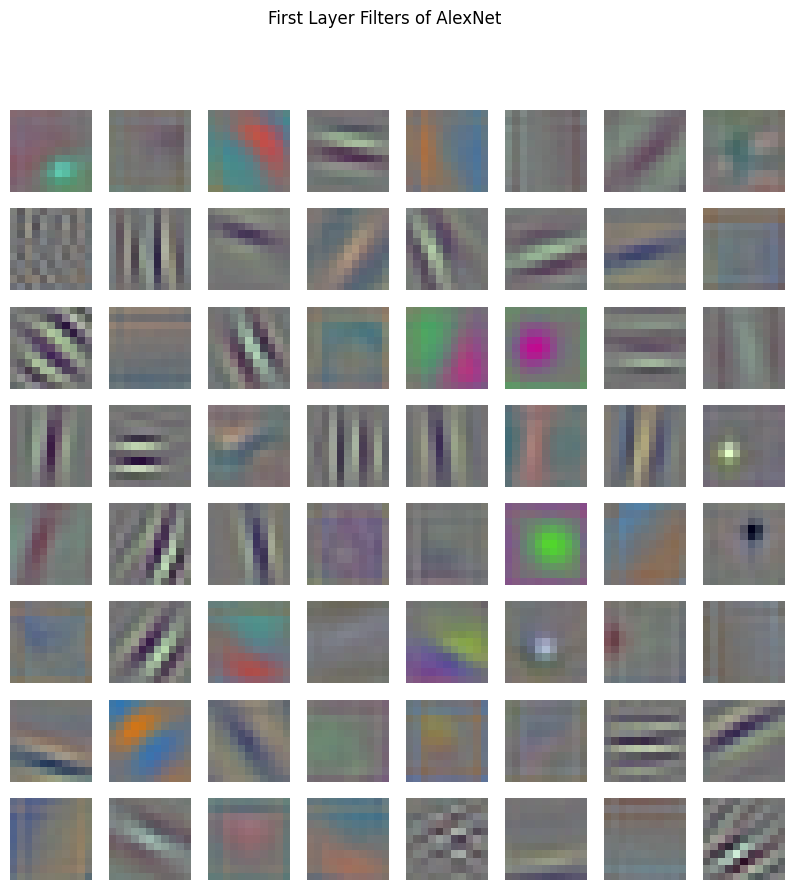

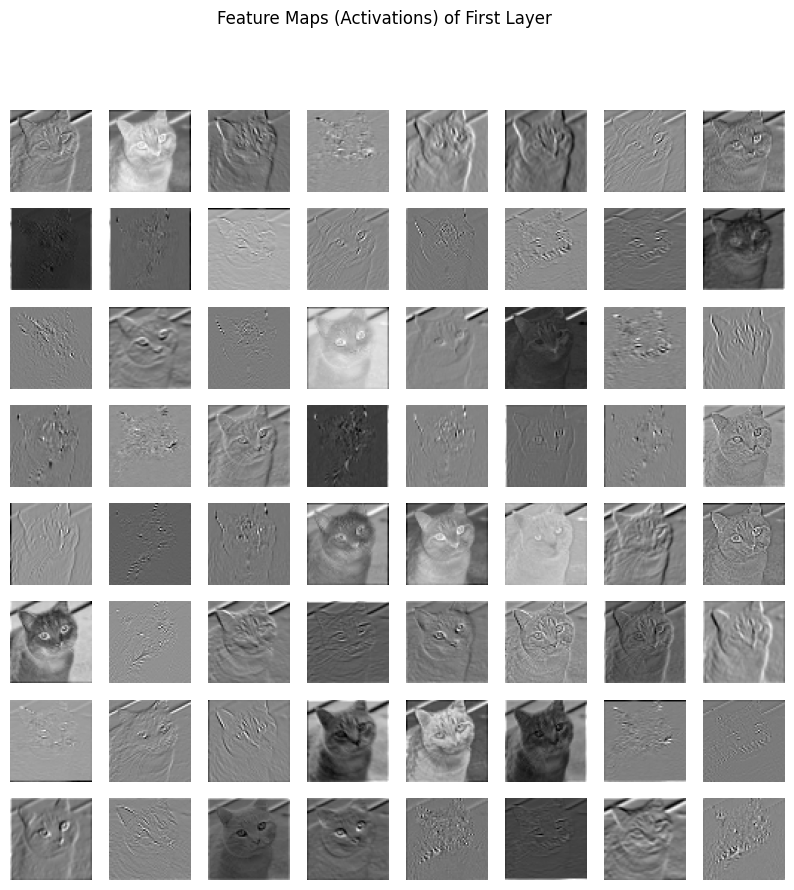

In [1]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO

# Load Pre-trained AlexNet
# Note: We use the updated 'weights' parameter instead of 'pretrained=True'
weights = models.AlexNet_Weights.IMAGENET1K_V1
model = models.alexnet(weights=weights)
model.eval()

# Visualize Filters (Kernels) of the first layer
# The first layer is model.features[0]
filters = model.features[0].weight.data.clone()
# Normalize filters for visualization (0 to 1)
filters = filters - filters.min()
filters = filters / filters.max()

def plot_filters(filters):
    plt.figure(figsize=(10, 10))
    for i in range(64): # AlexNet 1st layer has 64 filters
        plt.subplot(8, 8, i+1)

        # Transpose (C, H, W) -> (H, W, C) for matplotlib
        plt.imshow(filters[i].permute(1, 2, 0))
        plt.axis('off')
    plt.suptitle("First Layer Filters of AlexNet")
    plt.show()

plot_filters(filters)

# Visualize Feature Maps (Output of first layer)

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

try:
    response = requests.get(url, headers=headers, stream=True)
    response.raise_for_status() # Check for HTTP errors
    img = Image.open(BytesIO(response.content))

    # Preprocess
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])
    img_tensor = preprocess(img).unsqueeze(0) # Add batch dimension

    # Pass image through first layer
    with torch.no_grad():
        feature_maps = model.features[0](img_tensor)

    # Plot Feature Maps
    def plot_feature_maps(f_maps):
        f_maps = f_maps[0].cpu()
        plt.figure(figsize=(10, 10))
        for i in range(64):
            plt.subplot(8, 8, i+1)
            plt.imshow(f_maps[i], cmap='gray')
            plt.axis('off')
        plt.suptitle("Feature Maps (Activations) of First Layer")
        plt.show()

    plot_feature_maps(feature_maps)

except Exception as e:
    print(f"Error processing image: {e}")

**9. Train a GoogLeNet (Inception v1) or its variant using a standard dataset like CIFAR-10.Plot the training and validation accuracy over epochs and analyze overfitting or underfitting.**

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 303ms/step - accuracy: 0.2409 - loss: 2.1137 - val_accuracy: 0.4460 - val_loss: 1.5840
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6718 - loss: 1.1068 - val_accuracy: 0.4600 - val_loss: 1.5807
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7622 - loss: 0.7994 - val_accuracy: 0.5120 - val_loss: 1.4461
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8639 - loss: 0.5144 - val_accuracy: 0.5140 - val_loss: 1.4756
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9300 - loss: 0.3538 - val_accuracy: 0.5120 - val_loss: 1.5226
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9641 - loss: 0.2451 - val_accuracy: 0.5220 - val_loss: 1.5871
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9839 - loss: 0.1864 - val_accuracy: 0.5220 - val_loss: 1.6569
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accur

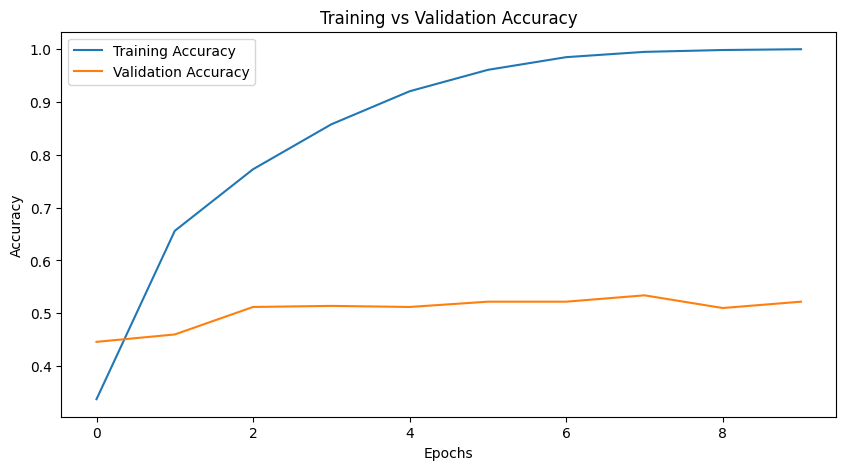

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Preprocess (InceptionV3 expects larger images, usually 75x75 minimum)
# We will use a small subset and resize for demonstration speed
x_train_resized = tf.image.resize(x_train[:2000], (75, 75))
y_train_subset = y_train[:2000]
x_test_resized = tf.image.resize(x_test[:500], (75, 75))
y_test_subset = y_test[:500]

# Define Model (InceptionV3 variant)
base_model = InceptionV3(include_top=False, input_shape=(75, 75, 3), weights='imagenet')
base_model.trainable = False # Speed up training by freezing

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(x_train_resized, y_train_subset, epochs=10,
                    validation_data=(x_test_resized, y_test_subset))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Analysis:

- Overfitting: If the Training Accuracy line keeps going up (e.g., reaches 99%) but the Validation Accuracy line flattens out or drops (e.g., stays at 60%), the model is overfitting.

- Underfitting: If both lines are low and not improving, the model is underfitting.

- Good Fit: If both lines increase together and stabilize at a high value.

**10. You are working in a healthcare AI startup. Your team is tasked with
developing a system that automatically classifies medical X-ray images into normal, pneumonia, and COVID-19. Due to limited labeled data, what approach would you suggest using among CNN architectures discussed (e.g., transfer learning with ResNet or Inception variants)? Justify your approach and outline a deployment strategy for production use.**

**Approach:** Transfer Learning with ResNet-50

**Justification:**

- Limited Data: Medical datasets are notoriously small. Training a CNN from scratch would result in severe overfitting. Transfer Learning allows us to leverage feature extractors trained on ImageNet (millions of images). While ImageNet contains dogs/cats, the low-level features (lines, curves, gradients) are universal and apply well to X-rays.

- Architecture Choice (ResNet): ResNet-50 is preferred over VGG because it is deeper (better feature hierarchy) but has fewer parameters (lighter model size). The residual connections prevent the vanishing gradient problem, ensuring the model learns subtle texture differences in lung X-rays effectively.

**Deployment Strategy:**

- Containerization: Wrap the trained model and preprocessing scripts in a Docker container. This ensures the code runs the same way on a developer's laptop as it does on the hospital server.

- Orchestration: Use Kubernetes if deploying across multiple hospitals to manage scaling.

- API Serving: Deploy the container using TensorFlow Serving or FastAPI. The hospital's Picture Archiving and Communication System (PACS) will send an X-ray image to this API endpoint and receive a JSON response: {"diagnosis": "Pneumonia", "confidence": 0.92}.

- Monitoring: Implement tools (like Prometheus/Grafana) to monitor model drift. If the X-ray machine hardware changes, the model might need retraining.

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_medical_classifier():
    # Load ResNet50 with ImageNet weights, excluding top
    base_model = tf.keras.applications.ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )

    # Freeze the base model
    base_model.trainable = False

    # Add custom head for 3 classes (Normal, Pneumonia, Covid)
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5), # Dropout is crucial for medical data to prevent overfitting
        layers.Dense(3, activation='softmax') # 3 output classes
    ])

    # Compile
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = build_medical_classifier()
print(model.summary())

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

None
